# DCBC model evaluation

In [3]:

import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.functional_profiles as fp
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats
import glob
import numpy as np
import os



In [5]:
# Import symmetric evaluation
Sym = pd.read_csv(
    f'{ut.model_dir}/Models/Evaluation/eval_dataset7_sym.tsv', sep='\t')
Sym['symmetry'] = 'Symmetric'
Sym['train_data_string'] = Sym['train_data']
Sym['train_data'] = Sym['train_data'].apply(lambda x: x.split("' '"))

# Append 14 & 28
Sym_add = pd.read_csv(
    f'{ut.model_dir}/Models/Evaluation/eval_dataset7_sym_14-28.tsv', sep='\t')
Sym_add['symmetry'] = 'Symmetric'
Sym_add['train_data_string'] = Sym_add['train_data']
Sym_add['train_data'] = Sym_add['train_data'].apply(
    lambda x: x.split("' '"))

# Remove non-crossvalidated tests
for i, row in Sym_add.iterrows():
    for j, train_data in enumerate(row['train_data']):
        train_data = train_data.replace('[', '')
        train_data = train_data.replace(']', '')
        train_data = train_data.replace("'", '')
        Sym_add.at[i, 'train_data'][j] = train_data

for i, row in Sym_add.iterrows():
    if row['test_data'] in row['train_data'] and not len(row['train_data']) == 7:
        Sym_add.drop(i, inplace=True)

# Import asymmetric evaluation
Asym = pd.read_csv(
    f'{ut.model_dir}/Models/Evaluation/eval_dataset7_asym-hem.tsv', sep='\t')
Asym['symmetry'] = 'Asymmetric'

# Remove non-crossvalidated tests
Asym['train_data_string'] = Asym['train_data']
Asym['train_data'] = Asym['train_data'].apply(lambda x: x.split("', '"))
# Remove brackets and quotation marks from train_data
for i, row in Asym.iterrows():
    for j, train_data in enumerate(row['train_data']):
        train_data = train_data.replace('[', '')
        train_data = train_data.replace(']', '')
        train_data = train_data.replace("'", '')
        Asym.at[i, 'train_data'][j] = train_data

for i, row in Asym.iterrows():
    if row['test_data'] in row['train_data'] and not len(row['train_data']) == 7:
        Asym.drop(i, inplace=True)

Asym.head(140).tail(20)


# # Asym = Asym[~Asym.apply(lambda x: x['test_data'] in x['train_data'], axis=1)]


,model_name,atlas,K,train_data,train_loglik,subj_num,common_kappa,dcbc_group,dcbc_indiv,model_type,test_sess,indivtrain_ind,indivtrain_val,test_data,symmetry,train_data_string
120,sym_De,MNISymC3,10,[Demand],120993.1875,4,True,0.153850,0.232661,Models_03,all,half,2,WMFS,Asymmetric,['Demand']
121,sym_De,MNISymC3,10,[Demand],120993.1875,5,True,0.159583,0.201627,Models_03,all,half,2,WMFS,Asymmetric,['Demand']
122,sym_De,MNISymC3,10,[Demand],120993.1875,6,True,0.145732,0.170626,Models_03,all,half,2,WMFS,Asymmetric,['Demand']
123,sym_De,MNISymC3,10,[Demand],120993.1875,7,True,0.061606,0.165019,Models_03,all,half,2,WMFS,Asymmetric,['Demand']
124,sym_De,MNISymC3,10,[Demand],120993.1875,8,True,0.041606,0.091571,Models_03,all,half,2,WMFS,Asymmetric,['Demand']
125,sym_De,MNISymC3,10,[Demand],120993.1875,9,True,0.078212,0.155791,Models_03,all,half,2,WMFS,Asymmetric,['Demand']
126,sym_De,MNISymC3,10,[Demand],120993.1875,10,True,0.077742,0.154338,Models_03,all,half,2,WMFS,Asymmetric,['Demand']
127,sym_De,MNISymC3,10,[Demand],120993.1875,11,True,0.037579,0.062873,Models_03,all,half,2,WMFS,Asymmetric,['Demand']
128,sym_De,MNISymC3,10,[Demand],120993.1875,12,True,0.060138,0.069921,Models_03,all,half,2,WMFS,Asymmetric,['Demand']
129,sym_De,MNISymC3,10,[Demand],120993.1875,13,True,0.133541,0.205053,Models_03,all,half,2,WMFS,Asymmetric,['Demand']


In [6]:
Data = pd.concat([Sym, Asym], axis=0)
Data = pd.concat([Data, Sym_add], axis=0)

# Loop through rows and add indicator for those where train_data list is of length 6
Data['train_data_len'] = Data['train_data'].apply(lambda x: len(x))
# Make Training column 'Single' if train_data_len is 1, 'All' if train_data_len is 7 and 'Leave_one_out' if train_data_len is 6
Data['Training'] = Data['train_data_len'].apply(
    lambda x: 'Single' if x == 1 else 'Leave_one_out')
Data.loc[Data['train_data_len'] == 7, 'Training'] = 'All'
Data.loc[Data['train_data_len'] == 6, 'train_data_string'] = 'Leave_one_out'
Data.loc[Data['train_data_len'] == 7, 'train_data_string'] = 'All'

# Show How many leave_one_out each K and each symmetry has
# Drop K=100
Data[Data['K'] != 100].groupby(
    ['symmetry', 'K', 'Training']).count()['test_data']


Data[(Data['K'] == 10) & (Data['model_name'] == 'sym_MdPoIbWmDeSo')].groupby(
    ['symmetry', 'atlas', 'model_name', 'Training', 'test_data', 'common_kappa', 'model_type']).count()

# Remove model_type 04 and K=100
Data = Data[(Data['model_type'] == 'Models_03') & (Data['K'] != 100)]
# Show pretty
# Data[(Data['K'] == 10) & (Data['model_name'] == 'sym_MdPoIbWmDeSo')]


In [7]:

Data[(Data['K'] == 10) ].groupby(
    ['symmetry', 'atlas', 'model_name', 'Training', 'test_data', 'common_kappa', 'model_type']).count()


K  \
symmetry   atlas    model_name Training test_data   common_kappa model_type       
Asymmetric MNISymC3 sym_De     Single   IBC         True         Models_03   24   
                                        MDTB        True         Models_03   48   
                                        Nishimoto   True         Models_03   12   
                                        Pontine     True         Models_03   16   
                                        Somatotopic True         Models_03   16   
...                                                                          ..   
Symmetric  MNISymC3 sym_Wm     Single   IBC         True         Models_03   24   
                                        MDTB        True         Models_03   48   
                                        Nishimoto   True         Models_03   12   
                                        Pontine     True         Models_03   16   
                                        Somatotopic True         Models_03   16   

                                                                             train_data  \
symmetry   atlas    model_name Training test_data   common_kappa model_type               
Asymmetric MNISymC3 sym_De     Single   IBC         True         Models_03           24   
                                        MDTB        True         Models_03           48   
                                        Nishimoto   True         Models_03           12   
                                        Pontine     True         Models_03           16   
                                        Somatotopic True         Models_03           16   
...                                                                                 ...   
Symmetric  MNISymC3 sym_Wm     Single   IBC         True         Models_03           24   
                                        MDTB        True         Models_03           48   
                                        Nishimoto   True         Models_03           12   
                                        Pontine     True         Models_03           16   
                                        Somatotopic True         Models_03           16   

                                                                             train_loglik  \
symmetry   atlas    model_name Training test_data   common_kappa model_type                 
Asymmetric MNISymC3 sym_De     Single   IBC         True         Models_03             24   
                                        MDTB        True         Models_03             48   
                                        Nishimoto   True         Models_03             12   
                                        Pontine     True         Models_03             16   
                                        Somatotopic True         Models_03             16   
...                                                                                   ...   
Symmetric  MNISymC3 sym_Wm     Single   IBC         True         Models_03             24   
                                        MDTB        True         Models_03             48   
                                        Nishimoto   True         Models_03             12   
                                        Pontine     True         Models_03             16   
                                        Somatotopic True         Models_03             16   

                                                                             indivtrain_ind  \
symmetry   atlas    model_name Training test_data   common_kappa model_type                   
Asymmetric MNISymC3 sym_De     Single   IBC         True         Models_03               24   
                                        MDTB        True         Models_03               48   
                                        Nishimoto   True         Models_03               12   
                                        Pontine     True         Models_03               16   
                                  

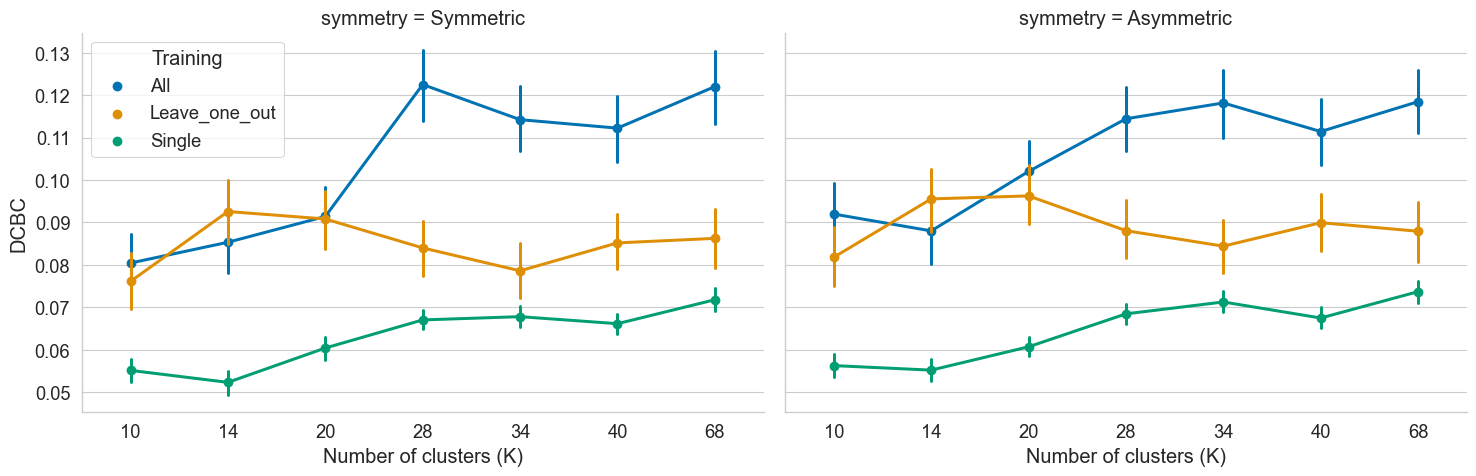

In [137]:
# Plot dcbc_group as a function of K with Hue = Training (# Plot only Ks where Symmetric and Asymmetric models have a value))
g = sb.catplot(x='K', y='dcbc_group', hue='Training', data=Data[Data['K'].isin([10, 14, 20, 28, 34, 40, 68, ])], kind='point', col='symmetry',
                palette='colorblind', height=5, aspect=1.5, legend_out=False)
g.set_axis_labels('Number of clusters (K)', 'DCBC')
g._legend.set_title('Training')
# plt.savefig(f'{ut.model_dir}/Figures/DCBC/DCBC_group.png', dpi=300)



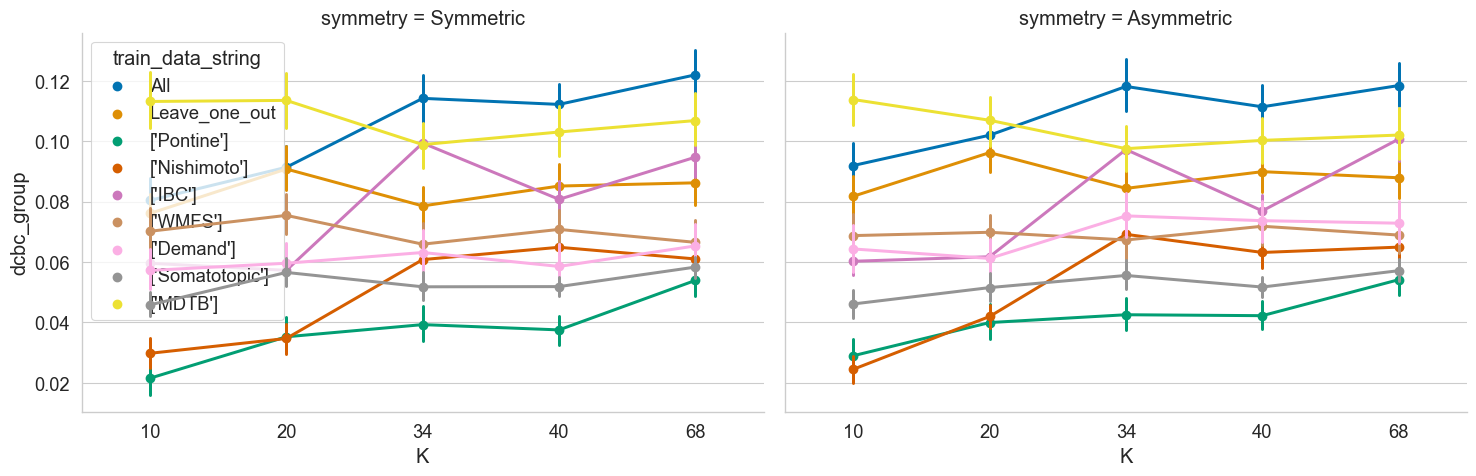

In [128]:
Data[(Data['symmetry'] == 'Asymmetric') & (Data['K'] == 10)
     & (Data['train_data_len'] == 1)].head(10)
g = sb.catplot(x='K', y='dcbc_group', hue='train_data_string', data=Data[Data['K'].isin([10, 20, 34, 40, 68, ])], kind='point', col='symmetry', 
               palette='colorblind', height=5, aspect=1.5, legend_out=False)


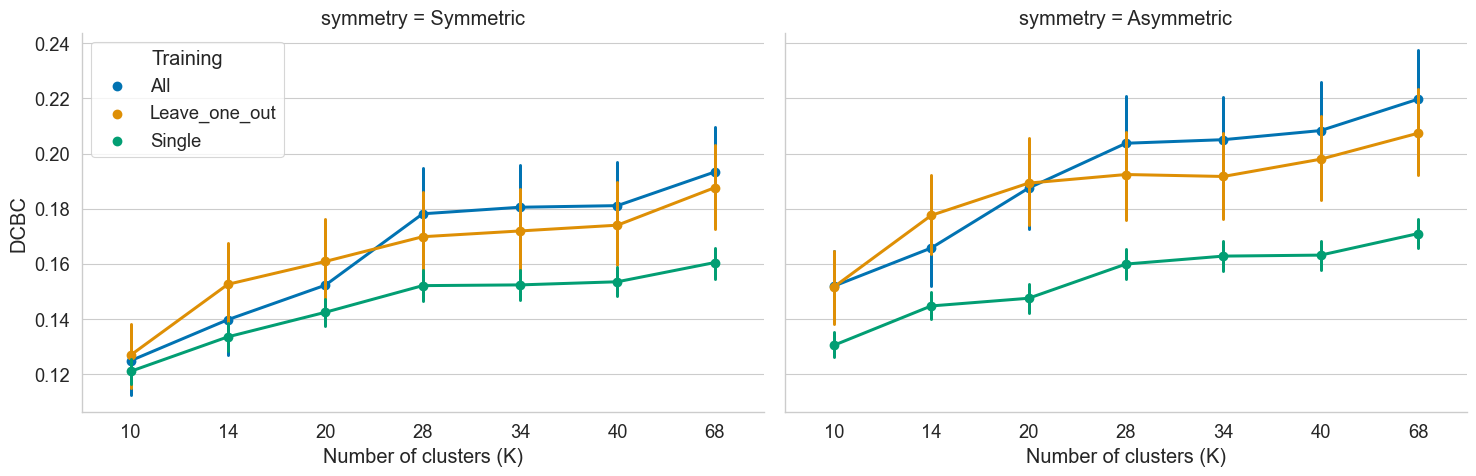

In [129]:
# Same plot for dcbc_individual
g = sb.catplot(x='K', y='dcbc_indiv', hue='Training', data=Data[Data['K'].isin([10, 14, 20, 28, 34, 40, 68, ])], kind='point', col='symmetry',
                palette='colorblind', height=5, aspect=1.5, legend_out=False)
g.set_axis_labels('Number of clusters (K)', 'DCBC')
g._legend.set_title('Training')


<Figure size 1000x2000 with 0 Axes>

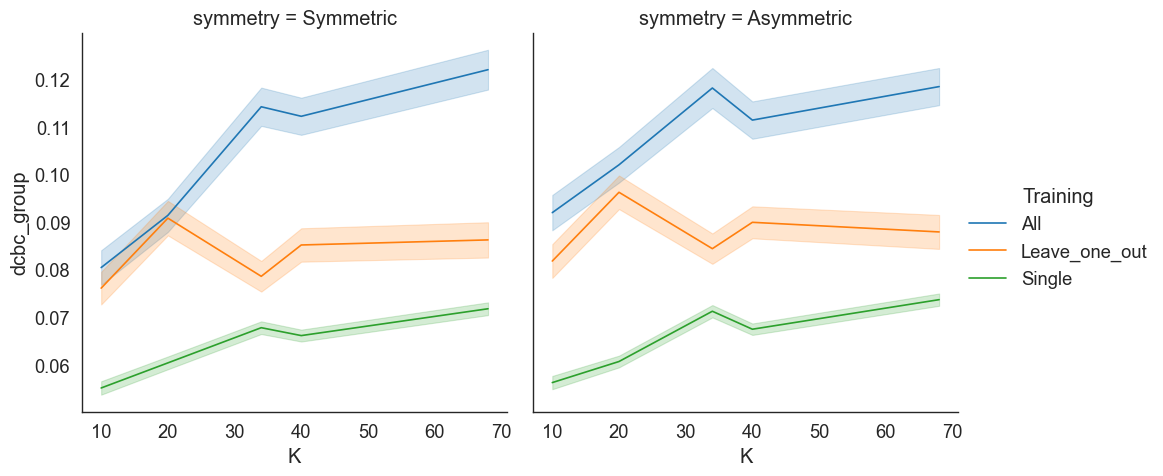

<Figure size 1000x2000 with 0 Axes>

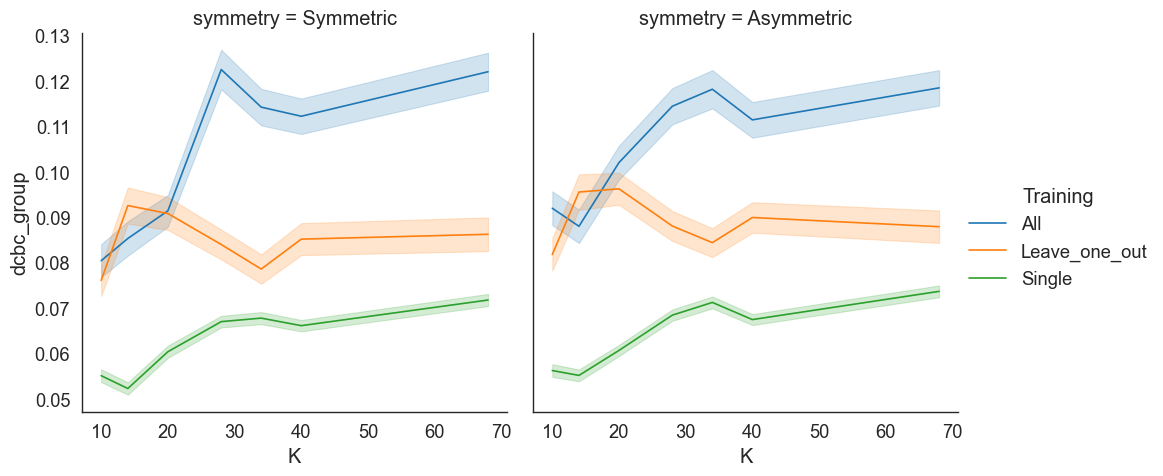

In [242]:
figsize = (10, 20)
plt.figure(figsize=figsize)
sb.set_style("white")
sb.relplot(
    data=Data[Data['K'].isin([10, 20, 34, 40, 68])], x="K", y="dcbc_group", hue="Training", kind="line", col="symmetry", markers=True, errorbar="se")
plt.savefig(f'{ut.figure_dir}/DCBC_group.pdf')

plt.figure(figsize=figsize)
sb.relplot(
    data=Data[Data['K'].isin([10, 14, 20, 28, 34, 40, 68])], x="K", y="dcbc_group", hue="Training", kind="line", col="symmetry", markers=True, errorbar="se")
plt.savefig(f'{ut.figure_dir}/DCBC_group_additional.pdf')


<Figure size 1000x2000 with 0 Axes>

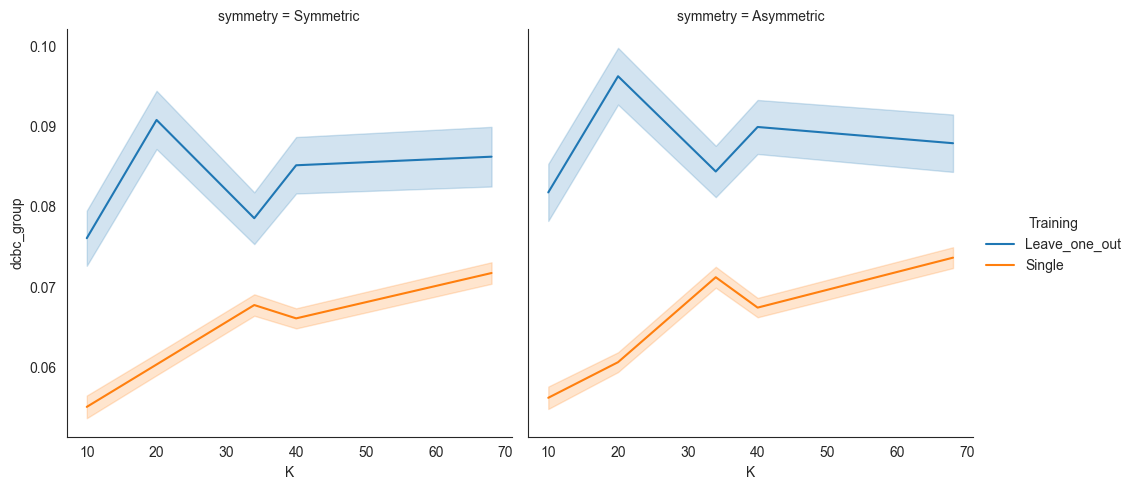

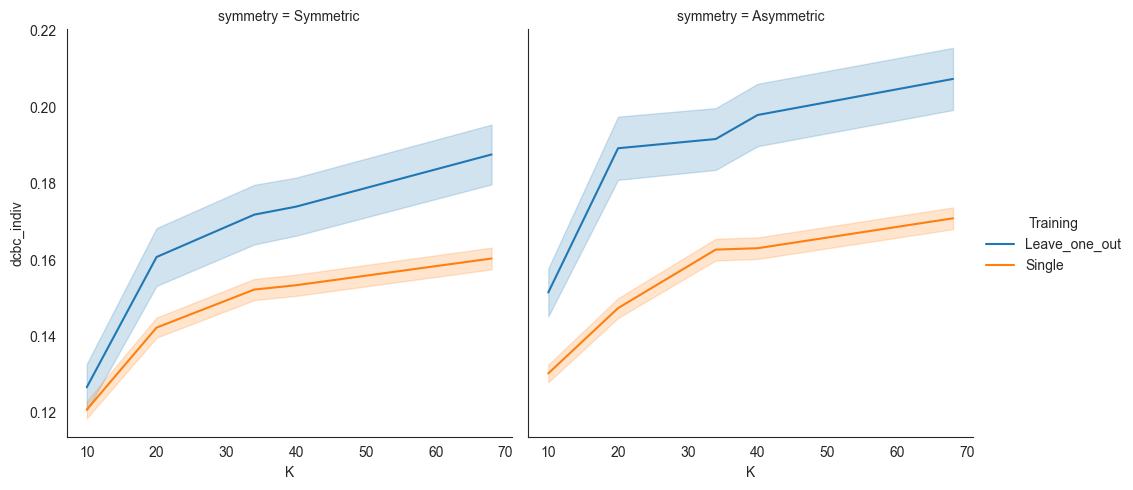

In [7]:
figsize = (10, 20)
plt.figure(figsize=figsize)
sb.set_style("white")
sb.relplot(
    data=Data[(Data['K'].isin([10, 20, 34, 40, 68]) & (Data['Training'].isin(['Single', 'Leave_one_out'])))], x="K", y="dcbc_group", hue="Training", kind="line", col="symmetry", markers=True, errorbar="se", palette='colorblind')
plt.savefig(f'{ut.figure_dir}/DCBC_group_cv.pdf')

sb.relplot(
    data=Data[(Data['K'].isin([10, 20, 34, 40, 68]) & (Data['Training'].isin(['Single', 'Leave_one_out'])))], x="K", y="dcbc_indiv", hue="Training", kind="line", col="symmetry", markers=True, errorbar="se", palette='colorblind')
plt.savefig(f'{ut.figure_dir}/DCBC_individual_cv.pdf')


<Figure size 1000x2000 with 0 Axes>

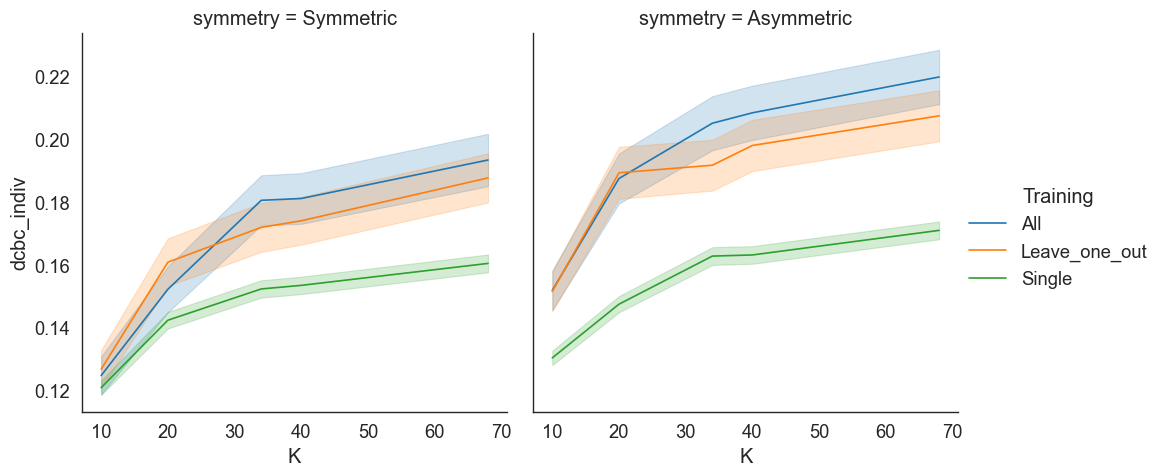

<Figure size 1000x2000 with 0 Axes>

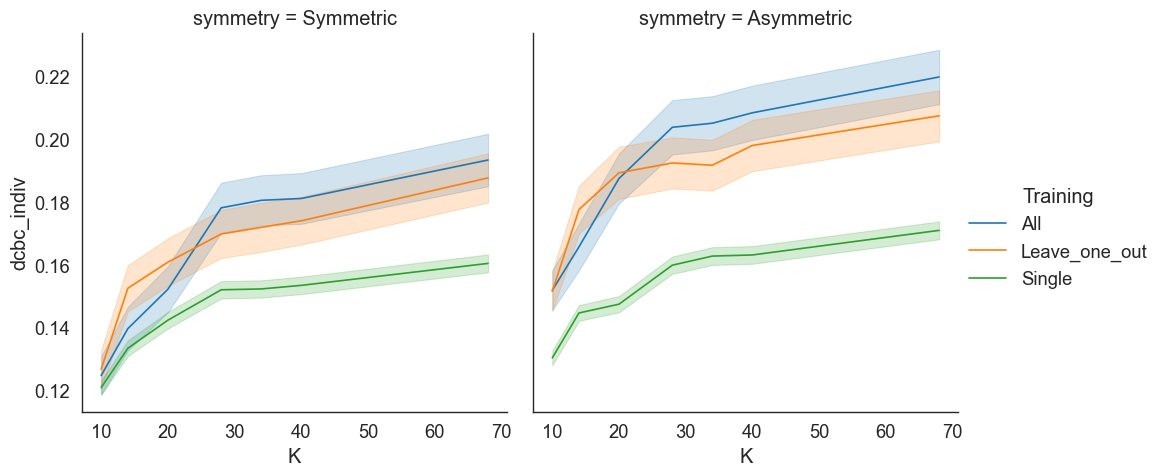

In [241]:
figsize = (10, 20)
plt.figure(figsize=figsize)
sb.set_style("white")
sb.relplot(
    data=Data[Data['K'].isin([10, 20, 34, 40, 68])], x="K", y="dcbc_indiv", hue="Training", kind="line", col="symmetry", markers=True, errorbar="se")
plt.savefig(f'{ut.figure_dir}/DCBC_individual.pdf')

plt.figure(figsize=figsize)
sb.relplot(
    data=Data[Data['K'].isin([10, 14, 20, 28, 34, 40, 68])], x="K", y="dcbc_indiv", hue="Training", kind="line", col="symmetry", markers=True, errorbar="se")
plt.savefig(f'{ut.figure_dir}/DCBC_individual_additional.pdf')


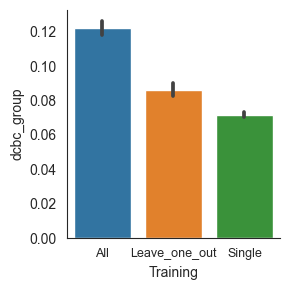

In [23]:
figsize = (3, 3)

# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
sb.color_palette(sb.color_palette("tab10"))
# Get the first three colors in the "tab10" color palette
colors = sb.color_palette("tab10", n_colors=3)
hex_codes = [
    f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}" for r, g, b in colors]
# Repeat colours to get 6 colours
hex_codes = np.repeat(hex_codes, 1)

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

sb.barplot(x='Training', y='dcbc_group', ax=ax, palette=hex_codes, errorbar='se', data=Data[(Data['K'] == 68) & (Data['symmetry'] == 'Symmetric')])

# Smaller xtick labels
ax.tick_params(axis='x', which='major', labelsize=9)

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_group_bar_symmetric_only.pdf', dpi=300)


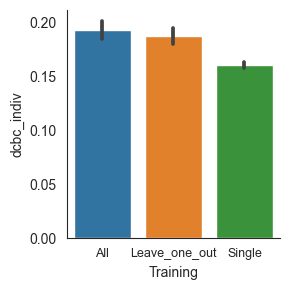

In [24]:
figsize = (3, 3)

# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
sb.color_palette(sb.color_palette("tab10"))
# Get the first three colors in the "tab10" color palette
colors = sb.color_palette("tab10", n_colors=3)
hex_codes = [
    f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}" for r, g, b in colors]
# Repeat colours to get 6 colours
hex_codes = np.repeat(hex_codes, 1)

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

sb.barplot(x='Training', y='dcbc_indiv', ax=ax, palette=hex_codes, errorbar='se',
           data=Data[(Data['K'] == 68) & (Data['symmetry'] == 'Symmetric')])

# Smaller xtick labels
ax.tick_params(axis='x', which='major', labelsize=9)

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_indiv_bar_symmetric_only.pdf', dpi=300)


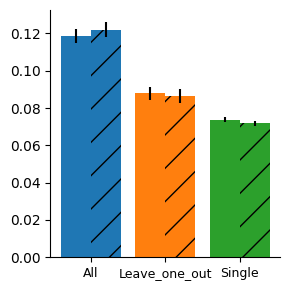

In [8]:
figsize = (3, 3)

# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
sb.color_palette(sb.color_palette("tab10"))
# Get the first three colors in the "tab10" color palette
colors = sb.color_palette("tab10", n_colors=3)
hex_codes = [
    f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}" for r, g, b in colors]
# Repeat colours to get 6 colours
hex_codes = np.repeat(hex_codes, 2)

# Define the data
categories = Data[Data['K'] == 68].Training.unique()
hues = Data[Data['K'] == 68].symmetry.unique()

# Calculate the mean values for each category and hue combination
mean_values = Data[Data['K'] == 68].groupby(['Training', 'symmetry'])[
    'dcbc_group'].mean().values

# Calculate the standard error of the mean for each category and hue combination
sem_values = Data[Data['K'] == 68].groupby(['Training', 'symmetry'])[
    'dcbc_group'].sem().values

# Define the colors for each category
colors = sb.color_palette("tab10", n_colors=len(categories))

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

# Iterate over each category
for i, category in enumerate(categories):
    # Get the color for the current category
    color = colors[i]

    # Plot the bars for the two hues
    j = 2 * i
    ax.bar([i - 0.2, i + 0.2], mean_values[j:j + len(hues)], width=0.4,
           yerr=sem_values[j:j + len(hues)],
           color=color, label=hues)
    
    # Set a different hatch for every second bar
    ax.patches[j+1].set_hatch('/')

# Set the x-axis tick labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
# Smaller xtick labels  
ax.tick_params(axis='x', which='major', labelsize=9)

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_group_bar.pdf', dpi=300)


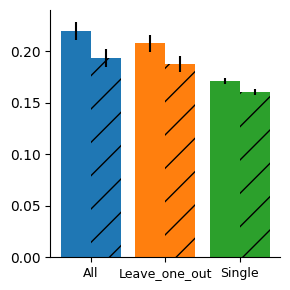

In [10]:
# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
sb.color_palette(sb.color_palette("tab10"))
# Get the first three colors in the "tab10" color palette
colors = sb.color_palette("tab10", n_colors=3)
hex_codes = [
    f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}" for r, g, b in colors]
# Repeat colours to get 6 colours
hex_codes = np.repeat(hex_codes, 2)

# Define the data
categories = Data[Data['K'] == 68].Training.unique()
hues = Data[Data['K'] == 68].symmetry.unique()

# Calculate the mean values for each category and hue combination
mean_values = Data[Data['K'] == 68].groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].mean().values

# Calculate the standard error of the mean for each category and hue combination
sem_values = Data[Data['K'] == 68].groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].sem().values

# Define the colors for each category
colors = sb.color_palette("tab10", n_colors=len(categories))

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

# Iterate over each category
for i, category in enumerate(categories):
    # Get the color for the current category
    color = colors[i]

    # Plot the bars for the two hues
    j = 2 * i
    ax.bar([i - 0.2, i + 0.2], mean_values[j:j + len(hues)], width=0.4,
           yerr=sem_values[j:j + len(hues)],
           color=color, label=hues)

    # Set a different hatch for every second bar
    ax.patches[j + 1].set_hatch('/')

# Set the x-axis tick labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
# Smaller xtick labels
ax.tick_params(axis='x', which='major', labelsize=9)

# plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_group_bar_individual.pdf', dpi=300)


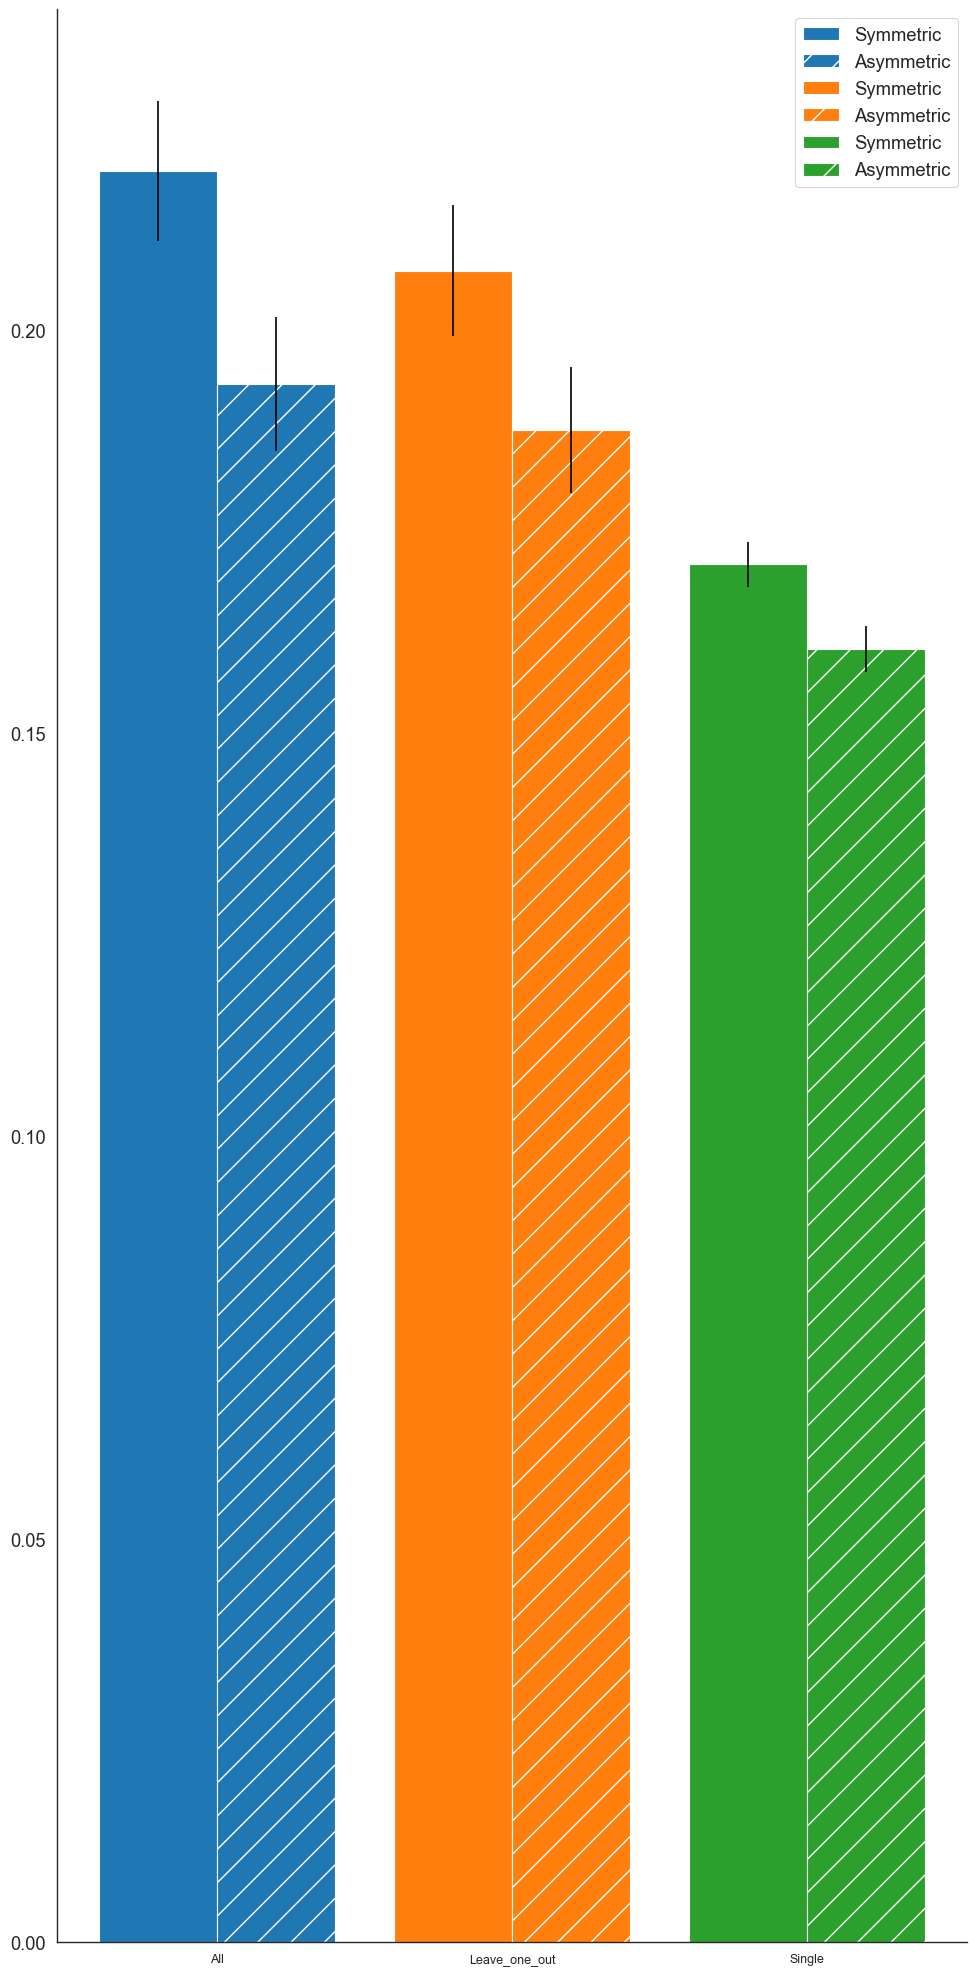

In [243]:
# Bar graph at K=68 with hue = Symmetry where hue bars are next to each other
sb.color_palette(sb.color_palette("tab10"))
# Get the first three colors in the "tab10" color palette
colors = sb.color_palette("tab10", n_colors=3)
hex_codes = [
    f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}" for r, g, b in colors]
# Repeat colours to get 6 colours
hex_codes = np.repeat(hex_codes, 2)

# Define the data
categories = Data[Data['K'] == 68].Training.unique()
hues = Data[Data['K'] == 68].symmetry.unique()

# Calculate the mean values for each category and hue combination
mean_values = Data[Data['K'] == 68].groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].mean().values

# Calculate the standard error of the mean for each category and hue combination
sem_values = Data[Data['K'] == 68].groupby(['Training', 'symmetry'])[
    'dcbc_indiv'].sem().values

# Define the colors for each category
colors = sb.color_palette("tab10", n_colors=len(categories))

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize)

# Iterate over each category
for i, category in enumerate(categories):
    # Get the color for the current category
    color = colors[i]

    # Plot the bars for the two hues
    j = 2 * i
    ax.bar([i - 0.2, i + 0.2], mean_values[j:j + len(hues)], width=0.4,
           yerr=sem_values[j:j + len(hues)],
           color=color, label=hues)

    # Set a different hatch for every second bar
    ax.patches[j + 1].set_hatch('/')

# Set the x-axis tick labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
# Smaller xtick labels
ax.tick_params(axis='x', which='major', labelsize=9)

plt.legend()
# Tight layout and despine
fig.tight_layout()
sb.despine()
# Export the plot at high resolution
plt.savefig(f'{ut.figure_dir}/DCBC_group_bar_individual_legend.pdf', dpi=300)


<Figure size 1000x500 with 0 Axes>

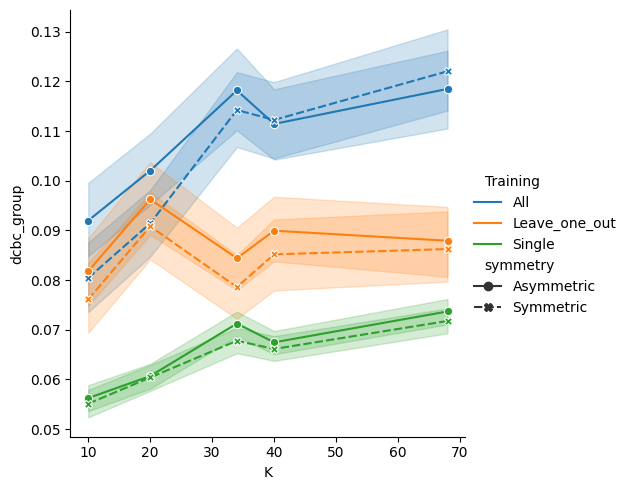

<Figure size 1000x500 with 0 Axes>

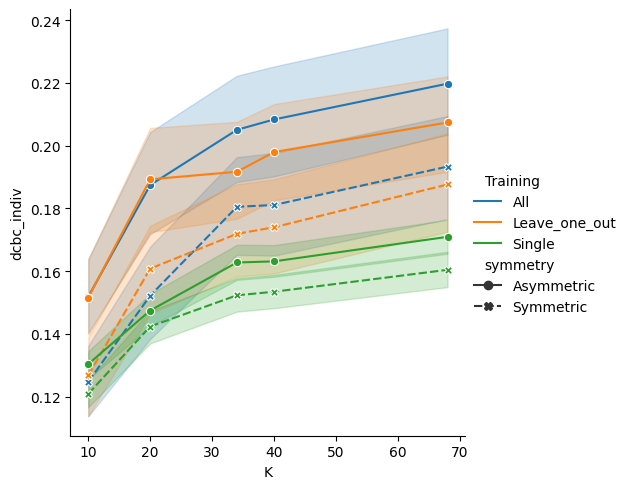

In [11]:
figsize=(10, 5)
plt.figure(figsize=figsize)
sb.relplot(
    data=Data[Data['K'].isin([10, 20, 34, 40, 68, ])], x="K", y="dcbc_group", hue="Training", kind="line", style="symmetry", markers=True, style_order=['Asymmetric', 'Symmetric'])
plt.savefig(f'{ut.figure_dir}/DCBC_group_hue-symmetry.pdf')    

plt.figure(figsize=figsize)
sb.relplot(
    data=Data[Data['K'].isin([10, 20, 34, 40, 68, ])], x="K", y="dcbc_indiv", hue="Training", kind="line", style="symmetry", markers=True, style_order=['Asymmetric', 'Symmetric'])
plt.savefig(f'{ut.figure_dir}/DCBC_individual_hue-symmetry.pdf')


In [132]:
# Import existing data
Existing = pd.read_csv(
    f'{ut.model_dir}/Models/Evaluation/eval_all_5existing_on_taskDatasets.tsv', sep='\t')

# Plot dcbc_group as a function of K with Hue
sb.set_style('whitegrid')
sb.set_context('paper', font_scale=1.5)
g = sb.catplot(x='K', y='dcbc_group', hue='train_data', data=Existing, kind='bar',
                palette='colorblind', height=5, aspect=1.5, legend_out=False)
g.set_axis_labels('Number of clusters (K)', 'DCBC')
g._legend.set_title('Training')



FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Models/Evaluation/eval_all_5existing_on_taskDatasets.tsv'